In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
# importing csv
df = pd.read_csv('out_.csv')
df.head()

,Unnamed: 0,symbol,price_24h,volume_24h,last_trade_price,difference,%_difference,date
0,0,ALGO-BTC,0.000031,223.638922,0.00003,0.0,0.0,11-05-2021
1,1,ALGO-BTC,0.000030,156.156380,0.00003,-0.0,0.0,11-06-2021
2,2,ALGO-BTC,0.000030,0.000000,0.00003,0.0,0.0,11-07-2021
3,3,ALGO-BTC,0.000028,1707.329433,0.00003,0.0,0.0,11-08-2021
4,4,ALGO-BTC,0.000029,204.832462,0.00003,-0.0,0.0,11-09-2021


In [3]:
model = KMeans(n_clusters=5, random_state=5)

In [4]:
symbol = df['symbol'].values
df.drop(['symbol', 'date', 'Unnamed: 0'], axis=1,inplace=True)
df

,price_24h,volume_24h,last_trade_price,difference,%_difference
0,0.000031,223.638922,0.00003,0.0,0.0
1,0.000030,156.156380,0.00003,-0.0,0.0
2,0.000030,0.000000,0.00003,0.0,0.0
3,0.000028,1707.329433,0.00003,0.0,0.0
4,0.000029,204.832462,0.00003,-0.0,0.0
...,...,...,...,...,...
5487,0.000000,0.000000,0.00000,0.0,0.0
5488,0.000000,0.000000,0.00000,0.0,0.0
5489,0.000000,0.000000,0.00000,0.0,0.0
5490,0.000000,0.000000,0.00000,0.0,0.0


In [5]:
df_dummies= pd.get_dummies(df, drop_first=True)

In [6]:
df_dummies.dtypes

price_24h           float64
volume_24h          float64
last_trade_price    float64
difference          float64
%_difference        float64
dtype: object

In [7]:
model.fit(df_dummies)

KMeans(n_clusters=5, random_state=5)

In [8]:
predictions = model.predict(df_dummies)
print(predictions)

[0 0 0 ... 0 0 0]


In [9]:
df["class"] = model.labels_
df['name'] = symbol
df.head()

,price_24h,volume_24h,last_trade_price,difference,%_difference,class,name
0,0.000031,223.638922,0.00003,0.0,0.0,0,ALGO-BTC
1,0.000030,156.156380,0.00003,-0.0,0.0,0,ALGO-BTC
2,0.000030,0.000000,0.00003,0.0,0.0,0,ALGO-BTC
3,0.000028,1707.329433,0.00003,0.0,0.0,0,ALGO-BTC
4,0.000029,204.832462,0.00003,-0.0,0.0,0,ALGO-BTC


In [10]:
df.dtypes

price_24h           float64
volume_24h          float64
last_trade_price    float64
difference          float64
%_difference        float64
class                 int32
name                 object
dtype: object

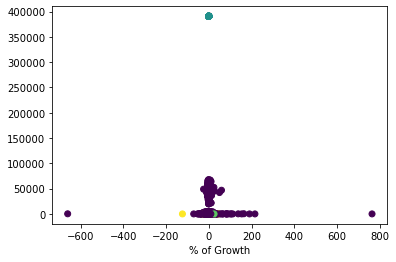

In [11]:
plt.scatter(x=df['%_difference'], y=df['price_24h'], c=df['class'])
plt.xlabel('% of Growth')
plt.ylabel('')
plt.show()

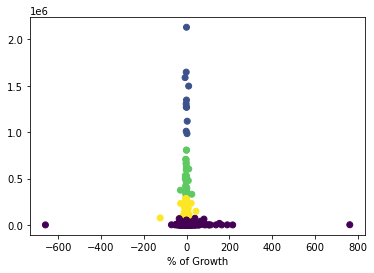

In [12]:
plt.scatter(x=df['%_difference'], y=df['volume_24h'], c=df['class'])
plt.xlabel('% of Growth')
plt.ylabel('')
plt.show()

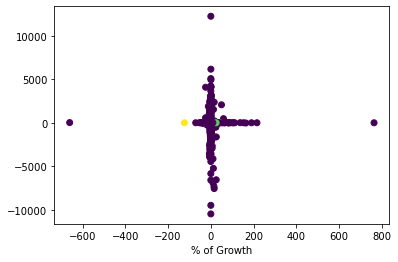

In [13]:
plt.scatter(x=df['%_difference'], y=df['difference'], c=df['class'])
plt.xlabel('% of Growth')
plt.ylabel('')
plt.show()

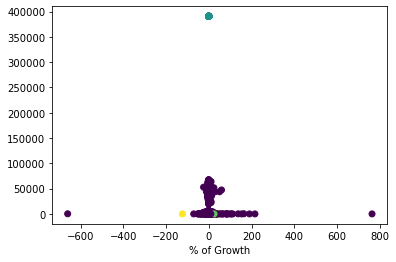

In [14]:
plt.scatter(x=df['%_difference'], y=df['last_trade_price'], c=df['class'])
plt.xlabel('% of Growth')
plt.ylabel('')
plt.show()

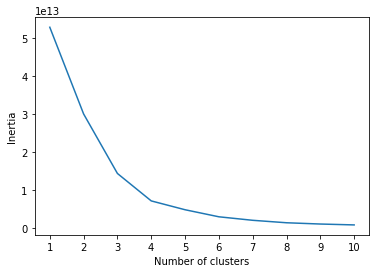

In [15]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_dummies)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
df.groupby(['class'])['class'].count()

class
0    5218
1      11
2      53
3      39
4     171
Name: class, dtype: int64

In [17]:
df

,price_24h,volume_24h,last_trade_price,difference,%_difference,class,name
0,0.000031,223.638922,0.00003,0.0,0.0,0,ALGO-BTC
1,0.000030,156.156380,0.00003,-0.0,0.0,0,ALGO-BTC
2,0.000030,0.000000,0.00003,0.0,0.0,0,ALGO-BTC
3,0.000028,1707.329433,0.00003,0.0,0.0,0,ALGO-BTC
4,0.000029,204.832462,0.00003,-0.0,0.0,0,ALGO-BTC
...,...,...,...,...,...,...,...
5487,0.000000,0.000000,0.00000,0.0,0.0,0,NEAR-EUR
5488,0.000000,0.000000,0.00000,0.0,0.0,0,NEAR-EUR
5489,0.000000,0.000000,0.00000,0.0,0.0,0,NEAR-EUR
5490,0.000000,0.000000,0.00000,0.0,0.0,0,NEAR-EUR
